# Home Work Assignment 2


## Problem 1

### Function P1


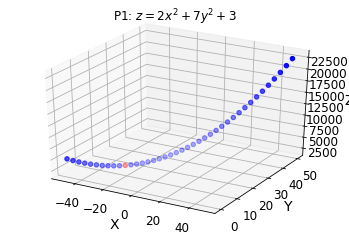

In [160]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d


# P1
def quad_1(x, y):
  return 2 * x ** 2 + 7 * y**2 + 3

# X Data & Y Data
x = np.linspace(-50, 50, 40)
y = np.linspace(0, 50, 40)

# Z Data
z = quad_1(x, y)


# Create a figure and subplots
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot for p1
zmin = np.min(z)
mask = np.array(z) == zmin
c = np.where(mask, 'red', 'blue')
ax.scatter3D(x, y, z, c=c)
ax.set_title(r'P1: $z= 2x^2 + 7y^2 + 3$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Show plots
plt.show()

### Function P2

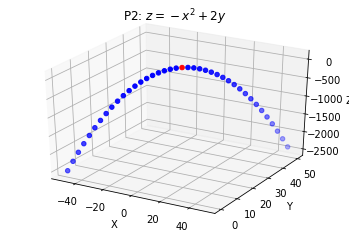

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

# P2
def quad_2(x, y):
  return -x ** 2 + 2 * y

# X Data & Y Data
x = np.linspace(-50, 50, 40)
y = np.linspace(0, 50, 40)

# Z Data
z = quad_2(x, y)

# Create a figure and subplots
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot for p2
zmax = np.max(z)
mask = np.array(z) == zmax
c = np.where(mask, 'red', 'blue')
ax.scatter3D(x, y, z, c=c)
ax.set_title(r'P2: $z= -x^2 + 2y$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Show plots
plt.show()

### Function P3


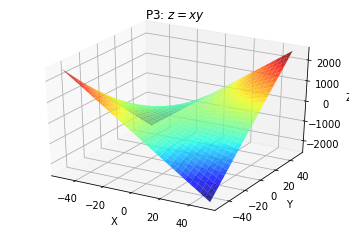

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import axes3d

# X Data & Y Data
x = np.outer(np.linspace(-50, 50, 30), np.ones(30))
y = x.copy().T
# Z Data
z = x*y

# Create a figure and subplots
fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot for p3
c = x + y
ax.plot_surface(x, y, z, cmap=plt.cm.jet, rstride=1, cstride=1, linewidth=0, alpha=0.8)
ax.set_title(r'P3: $z= xy$')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


# Show plots
plt.show()

### Plotting simple arrays with MatPlotLib and Pyplot

## Problem 2
## Mini-Batch Gradient Descent for n = 2

Linear regression predicts $\hat{y}=b + w_1 x_1 + w_2 x_2 $. It will be convenient to rewrite this as a dot product.  Define $w=(w_0, w_1, w_2)$ and $x=(1, x_1, x_2)$.  Then, we have $\hat{y}=w \boldsymbol{\cdot} x$.

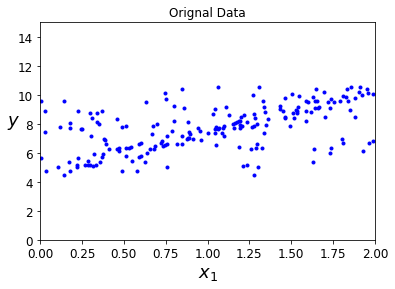


(3, 1)
(100, 1)
(100, 1)
(3, 1)



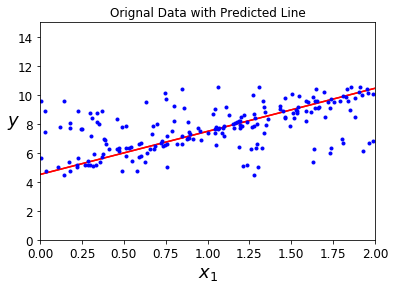

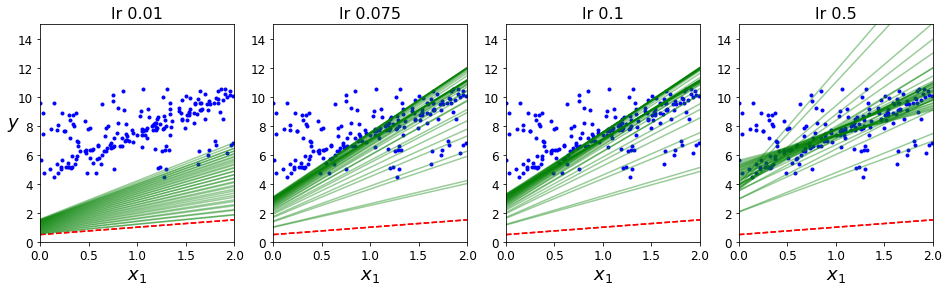

ValueError: ignored

In [154]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)




m = 100
# Create array of features X = [x1, x2]
X = 2 * np.random.rand(m, 2)
# print('X shape: ', X.shape)
# print(X[:4,])
# print()
# Create corresponding array of y values
Y = 4 + 3 * X[:, 0:1] + 0.001 * X[:, 1:2] + np.random.rand(m, 1)
# print('y shape: ', Y.shape)
# print(Y[:4,])
# print()


# Show the current data
plt.plot(X, Y, "b.")
plt.title('Orignal Data')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()



X_b = np.column_stack([np.ones((100,1)),X])
# print('X_b: first 4 cols\n', X_b.T[:, :4])
# print()
# print(X_b.T.dot(X_b).shape)
# print( np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).shape)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
# print(theta_best.shape)
# print('Closest distance to real thetas: \n', theta_best)


X_new = np.array([[0, 0],[2, 2]])
# print(X_new.shape)
# print(X_new)
X_new_b = np.column_stack([np.ones((2,1)),X_new])
# print(X_new_b)
y_predict = X_new_b.dot(theta_best)
# print(y_predict)

# Plot Prediction
plt.plot(X_new,y_predict,'r-')
plt.title('Orignal Data with Predicted Line')
plt.plot(X,Y,'b.')
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0,2,0,15])


# number of epochs
epochs = 20
# learning rate
lr = 0.01
# fix initial random weight for gradient descent (batch gradient descent)
np.random.seed(42)
initial_weight = np.random.randn(3, 1) 


# sanity check (I will use this to explain how the vectorized code works)
print()
print(initial_weight.shape)
print(Y.shape)
print((X_b.dot(initial_weight)).shape)
print((X_b.T.dot(X_b.dot(initial_weight))).shape)
print()

weight = initial_weight
weight_path_mgd = []
batch_size = 4

weight_path_mgd.append(weight)
for epoch in range(epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = Y[shuffled_indices]
    for i in range(0, m, batch_size):
        xi = X_b_shuffled[i:i+batch_size]
        yi = y_shuffled[i:i+batch_size]
        gradient = 1 / batch_size * xi.T.dot(xi.dot(weight) - yi)
        weight = weight - lr * gradient
        weight_path_mgd.append(weight)

# print(weight_path_mgd[-1])
weight_path_mgd = np.array(weight_path_mgd)


def plot_gradient_descent(weight, lr, weight_path=None):
    # plot training data
    plt.plot(X, Y, "b.")
    # plot initial prediction
    y_predict = X_new_b.dot(weight)
    plt.plot(X_new, y_predict, "r--")
    
    if weight_path is not None:
      weight_path.append(weight)

    for epoch in range(epochs):
        gradient = 1 / m * X_b.T.dot(X_b.dot(weight) - y)
        weight = weight - lr * gradient
        if weight_path is not None:
            weight_path.append(weight)
        # plot prediction after weight update
        y_predict = X_new_b.dot(weight)
        plt.plot(X_new, y_predict, "-", color='green', alpha=0.4)
        
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title("lr {}".format(lr), fontsize=16)



# Plot Results of MBGD
weight_path_mgd = []
plt.figure(figsize=(16, 4))
plt.title('Mini Batch Gradient Descent')
plt.subplot(141); plt.ylabel("$y$", rotation=0, fontsize=18); plot_gradient_descent(initial_weight, 0.01,weight_path_mgd)
plt.subplot(142); plot_gradient_descent(initial_weight, 0.075, weight_path_mgd)
plt.subplot(143); plot_gradient_descent(initial_weight, 0.1,weight_path_mgd)
plt.subplot(144); plot_gradient_descent(initial_weight, 0.5,weight_path_mgd)
plt.show()

# Compare the results of different types of GD
weight_path_mgd = np.array(weight_path_mgd)
plt.figure(figsize=(12,12))
# plt.plot(weight_path_sgd[:, 0], weight_path_sgd[:, 1], "r-s", linewidth=1, label="stochastic")
plt.plot(weight_path_mgd[:, 0], weight_path_mgd[:, 1], "g-s", linewidth=2, label="mini-batch")
# plt.plot(weight_path_bgd[:, 0], weight_path_bgd[:, 1], "b-s", linewidth=3, label="batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$w_0$", fontsize=20)
plt.ylabel(r"$w_1$   ", fontsize=20, rotation=0)
plt.axis([-1, 5, -1, 4])
plt.show()


## Problem 3

### MNIST Digit Recognition


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


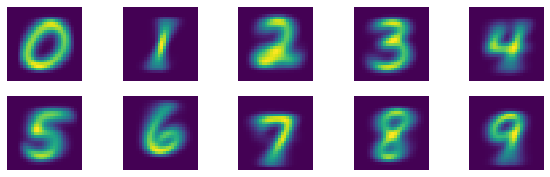

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf

mnist = tf.keras.datasets.mnist

# Load MNIST dataset
train_data, test_data = mnist.load_data()

# Split the orignal train and test data
train_images_original, train_labels_original = train_data
test_images_original, test_labels_original = test_data



# Find the Average MNIST digit for each number class
# Modified from https://stackoverflow.com/questions/54965346/average-image-of-mnist, author: Jason
plt.figure(figsize=(10,3))
plt.title('Average MNIST Class Digit')
# average = np.average(train_images_original[train_labels_original==0],0)
for i in range(10):
    average = np.average(train_images_original[train_labels_original==i],0)
    plt.subplot(2, 5, i+1)
    plt.imshow(average) 
    plt.axis('off')



# Reshape 28x28 images to be floats 
train_images = train_images_original.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images_original.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255


# Encode labels
train_labels = tf.keras.utils.to_categorical(train_labels_original) 
test_labels = tf.keras.utils.to_categorical(test_labels_original)

# Create a sequential model
model = tf.keras.models.Sequential()
# Add 2 layers to model
model.add(tf.keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
model.summary()

# Compilation step
model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Training
epochs = 10
# history = model.fit(train_images, 
#                       train_labels, 
#                       epochs=epochs, 
#                       batch_size=128, 
#                       validation_data=(test_images, test_labels))